In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import umap

/Users/niranjan/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  long_ = _make_signed(np.long)


AttributeError: module 'numpy' has no attribute 'long'

In [29]:
data = pd.read_csv('combined_dataset_with_meta.csv')
data.head()

,Unnamed: 0,cad_status,V1,V2,V3,V4,V5,V6,V7,V8,...,V45006,V45007,V45008,V45009,V45010,V45011,V45012,V45013,V45014,V45015
0,GSM518638,ctrl,14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,...,4.375744,4.375470,4.375175,4.374851,4.374460,4.374081,4.373631,4.373159,14.601661,14.611620
1,GSM518639,ctrl,14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,...,4.369999,4.369760,4.369473,4.369171,4.368822,4.368453,4.368054,4.367606,14.644090,14.645912
2,GSM518640,ctrl,14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,...,4.414065,4.413724,4.413332,4.412898,4.412431,4.411905,4.490200,4.410683,14.762733,14.760449
3,GSM518641,ctrl,13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,...,4.381866,4.381684,4.381487,4.381260,4.381008,4.402942,4.380408,4.380068,12.963127,12.872982
4,GSM518642,ctrl,13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,...,4.359774,4.359587,4.359380,4.359152,4.358910,4.358640,4.358351,4.358035,13.632483,13.543409


In [30]:
data_matrix = data.iloc[:,2:]
data_matrix.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V45006,V45007,V45008,V45009,V45010,V45011,V45012,V45013,V45014,V45015
0,14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,4.384732,4.384889,...,4.375744,4.375470,4.375175,4.374851,4.374460,4.374081,4.373631,4.373159,14.601661,14.611620
1,14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,4.367707,4.367985,...,4.369999,4.369760,4.369473,4.369171,4.368822,4.368453,4.368054,4.367606,14.644090,14.645912
2,14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,4.417455,4.418045,...,4.414065,4.413724,4.413332,4.412898,4.412431,4.411905,4.490200,4.410683,14.762733,14.760449
3,13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,4.381747,4.382130,...,4.381866,4.381684,4.381487,4.381260,4.381008,4.402942,4.380408,4.380068,12.963127,12.872982
4,13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,4.366071,4.366241,...,4.359774,4.359587,4.359380,4.359152,4.358910,4.358640,4.358351,4.358035,13.632483,13.543409


In [35]:
SS = MinMaxScaler()

# Apply scaling
data_scaled = pd.DataFrame(SS.fit_transform(data_matrix), columns=data_matrix.columns)

# PCA
pca = PCA(n_components=3)
data_scaled_pca = pca.fit_transform(data_scaled)

# Convert to data frame
principal_df = pd.DataFrame(data = data_scaled_pca, columns = ['PC1', 'PC2', 'PC3'])
principal_df = principal_df.join(data['cad_status'])

# Shape and preview
print(principal_df.shape)
print(pca.explained_variance_ratio_)

(393, 4)
[0.93375644 0.01175282 0.00542268]


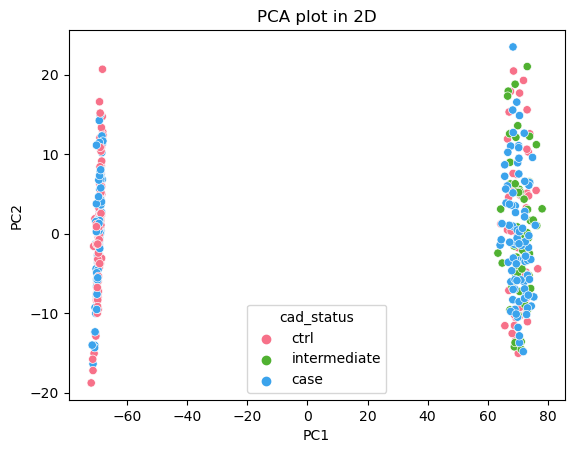

In [36]:
plt.figure()

# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,0], y=principal_df.iloc[:,1], hue=principal_df.iloc[:,3], palette='husl')

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

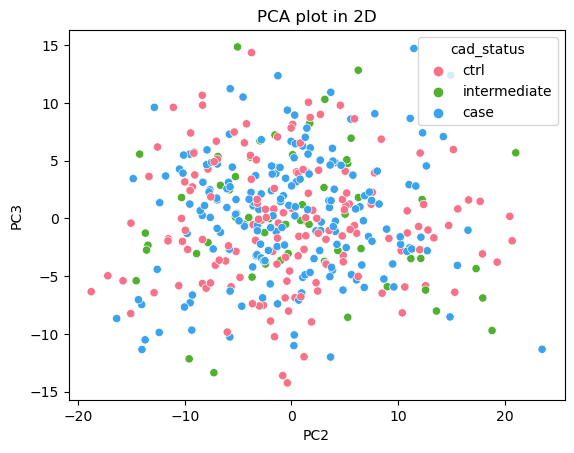

In [37]:
plt.figure()

# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,1], y=principal_df.iloc[:,2], hue=principal_df.iloc[:,3], palette='husl')

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.show()

In [38]:
# t-SNE
tsne = TSNE(n_components=3)
data_scaled_tsne = tsne.fit_transform(data_scaled)

# Convert to data frame
tsne_df = pd.DataFrame(data = data_scaled_tsne, columns = ['tsne comp. 1', 'tsne comp. 2', 'tsne comp. 3'])
tsne_df = tsne_df.join(data['cad_status'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(393, 4)


,tsne comp. 1,tsne comp. 2,tsne comp. 3,cad_status
0,10.173713,0.532316,-2.257132,ctrl
1,12.307400,2.623753,0.180260,ctrl
2,9.000465,1.182155,3.371344,ctrl
3,9.798861,-2.665488,-0.961722,ctrl
4,8.411975,3.499915,-1.273190,ctrl


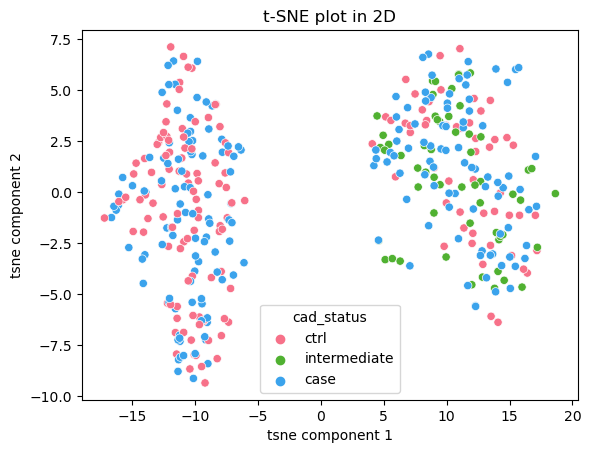

In [39]:
plt.figure()

# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,0], y=tsne_df.iloc[:,1], hue=tsne_df.iloc[:,3], palette='husl')

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

plt.show()

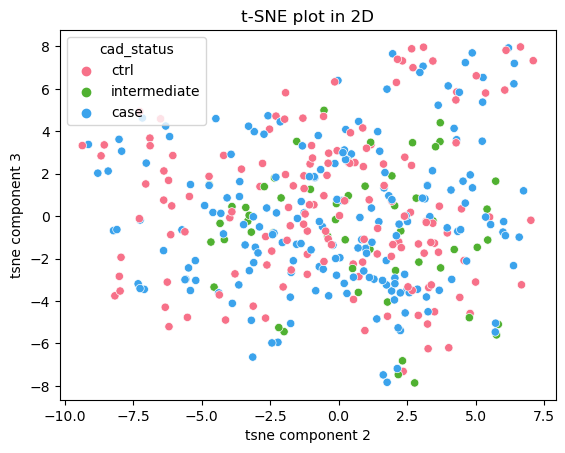

In [41]:
plt.figure()

# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,1], y=tsne_df.iloc[:,2], hue=tsne_df.iloc[:,3], palette='husl')

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 2')
plt.ylabel('tsne component 3')

plt.show()

In [42]:
# UMAP
um = umap.UMAP()
data_scaled_fit = um.fit(data_scaled)           # we'll use X_fit later
data_scaled_umap = um.transform(data_scaled)

# Convert to data frame
umap_df = pd.DataFrame(data = data_scaled_umap, columns = ['umap comp. 1', 'umap comp. 2'])
umap_df = umap_df.join(gse_20680['cad_status'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

NameError: name 'umap' is not defined

'1.24.4'